**Parcial 3 de Métodos Computacionales**

*Nataly Lucía Murillo Mosquera*

CC *1003970969*

In [41]:
# Librerías
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

***Nombre de datos:***

m: Masa (kg)

k: Constante elástica

x: Posición

v: Velocidad

$N_0$: Número inicial de partículas presentes

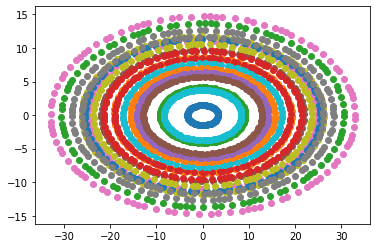

In [98]:
# Primer punto:

def problema(p,n):
  x,v = p
  m = 0.2
  return [v, ((-1)/m)*x]

r = [np.random.uniform(-15,15, size=(1,2)) for i in range(20)]
a = [np.transpose(odeint(problema, i[0], np.linspace(0,100,100))) for i in r]

for i in range(len(a)):
  plt.scatter(a[i][1], a[i][0])

In [51]:
# Base de datos de una muestra de Strontium entregada por el docente:

datos = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

La vida media es de 27.99 años, con un error de 4.91
La vida media es de 28 años, con un error de 5


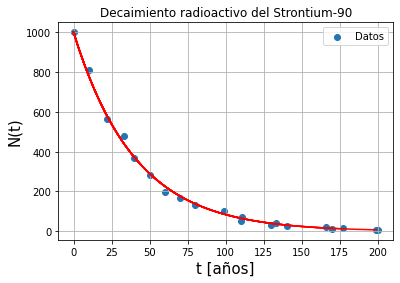

In [93]:
# Segundo punto:

def N(t,τ):
  d = np.vectorize(N)
  λ = -np.log(2)/τ  # Constante de decaimiento
  N_0 = 1000
  return N_0*np.exp(λ*t)  # Así está determinado el decaimiento radioactivo

# a) Fit a los datos y determinar la vida media con su respectivo error
τ_strontium, error = curve_fit(N, datos['t'], datos['N(t)'])
rango = np.linspace(datos.t[0], datos.t[:-1])

print(f'La vida media es de {τ_strontium[0]:.2f} años, con un error de {np.sqrt(np.diag(error))[0]*12:.2f}') # Expresado con 2 decimales
print(f'La vida media es de {τ_strontium[0]:.0f} años, con un error de {np.sqrt(np.diag(error))[0]*12:.0f}') # Sin decimales

# b) Graficar los datos como puntos en el plano t, N(t) y el correspondienta al fit
plt.figure()
plt.plot(rango, N(rango, τ_strontium[0]), 'red')
plt.scatter(datos['t'], datos['N(t)'], label='Datos')
plt.xlabel('t [años]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)
plt.title('Decaimiento radioactivo del Strontium-90')
plt.legend()
plt.grid()
